In [1]:
# import the usual
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
#Music Data Loading
df = pd.read_csv("../Dataset/lastfm/userid-timestamp-artid-artname-traid-traname.tsv", sep="\t", error_bad_lines=False, header = None)
dfsmall = pd.read_csv("../Dataset/lastfm/usersha1-profile.tsv",sep='\t',names=['userId','gender','age','country','signupDate'])
data = pd.read_csv("../Dataset/lastfm/usersha1-artmbid-artname-plays.tsv",sep='\t',names=['userId','artistId','artist','plays'])

b'Skipping line 2120260: expected 6 fields, saw 8\n'
b'Skipping line 2446318: expected 6 fields, saw 8\n'
b'Skipping line 11141081: expected 6 fields, saw 8\n'
b'Skipping line 11152099: expected 6 fields, saw 12\nSkipping line 11152402: expected 6 fields, saw 8\n'
b'Skipping line 11882087: expected 6 fields, saw 8\n'
b'Skipping line 12902539: expected 6 fields, saw 8\nSkipping line 12935044: expected 6 fields, saw 8\n'
b'Skipping line 17589539: expected 6 fields, saw 8\n'


In [3]:
df.columns = ['userid', 'timestamp', 'artistid', 'artist', '1', 'song']

In [4]:
df[:100]

,userid,timestamp,artistid,artist,1,song
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
...,...,...,...,...,...,...
95,user_000001,2009-05-01T08:58:19Z,NaN,Ivan Enot,NaN,Grooves Of The Heart
96,user_000001,2009-05-01T08:52:36Z,1e68e986-e1f7-42ef-be43-086c858db02e,J. Boogie'S Dubtronic Science,66eb69ab-a5e3-4d17-92a6-754c898e4c86,Leave It All Behind (Feat. The Rebirth & Aima ...
97,user_000001,2009-05-01T08:45:19Z,c2fc3098-b9a5-41ab-b897-e6d67b097dfa,Home & Garden,820c1ffc-5a54-4d68-9603-765b83531578,Someday (Feat. Lisa Shaw)
98,user_000001,2009-05-01T08:41:49Z,278db520-adb6-4d27-a770-7539fa2e33b7,Kissey Asplund,NaN,Move Me [Feat. Soliloquy]


In [5]:
df['time'] = pd.to_datetime(df['timestamp'])

In [6]:
df.drop(['timestamp'], axis=1, inplace=True)

In [7]:
df.head()

,userid,artistid,artist,1,song,time
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,2009-05-04 23:08:57+00:00
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),2009-05-04 13:54:10+00:00
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),2009-05-04 13:52:04+00:00
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),2009-05-04 13:42:52+00:00
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),2009-05-04 13:42:11+00:00


### Removing artist name and song id (possibly) from the user_songs_df dataframe

In [8]:
user_songs_df = df.drop(['artist'], axis=1, inplace=False)

In [9]:
user_songs_df.columns = ['userid', 'artistid', 'songid', 'song', 'time']

In [10]:
user_songs_df = user_songs_df.drop(['songid'], axis=1, inplace=False)

In [11]:
user_songs_df.head()

,userid,artistid,song,time
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,2009-05-04 23:08:57+00:00
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Composition 0919 (Live_2009_4_15),2009-05-04 13:54:10+00:00
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Mc2 (Live_2009_4_15),2009-05-04 13:52:04+00:00
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Hibari (Live_2009_4_15),2009-05-04 13:42:52+00:00
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Mc1 (Live_2009_4_15),2009-05-04 13:42:11+00:00


In [17]:
user_songs_df['song'].nunique()

1083471

In [14]:
# pd.merge(user_songs_df, songs_df, on='song')

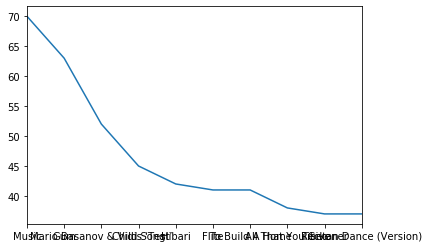

In [15]:
# user_songs_df[user_songs_df['userid'] == 'user_000001']['song'].value_counts()[:10].plot()

In [16]:
# user_songs_df['userid'].nunique()

992

In [44]:
# user_songs_df['song'].nunique()

1083471

In [42]:
# user_songs_df['song'].value_counts()[:20].plot(kind='bar')

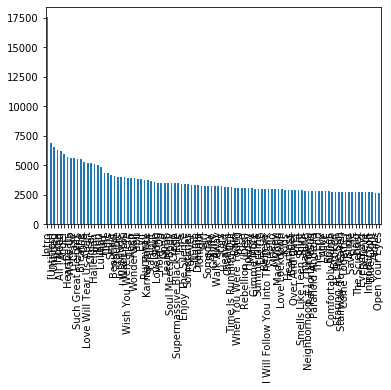

In [47]:
# user_songs_df['song'].value_counts()[:100].plot(kind='bar')

In [19]:
# user_songs_df.groupby("userid").filter(lambda x: len(x) > 10000).shape

(17386628, 4)

In [20]:
# user_songs_df.groupby("userid").filter(lambda x: len(x) > 100000).shape

(1737175, 4)

In [21]:
# user_songs_df.groupby("userid").filter(lambda x: len(x) > 1000000).shape

(0, 4)

In [36]:
# user_songs_df.groupby("userid").filter(lambda x: len(x) > 1000).shape

(19060973, 4)

In [12]:
def get_song_unique_count(song_column):
#     print("len of list : "+str(len(song_column)))
#     print("len of set : "+str(len(set(song_column))))
    return len(set(song_column))

In [58]:
# user_songs_df.groupby("userid").filter(lambda x: get_song_unique_count(x['song'])>1000).shape

len of list : 16685
len of set : 3092
len of list : 57438
len of set : 8129
len of list : 19494
len of set : 4565
len of list : 18411
len of set : 5974
len of list : 20341
len of set : 1974
len of list : 29021
len of set : 7733
len of list : 2454
len of set : 1093
len of list : 37235
len of set : 608
len of list : 5233
len of set : 2555
len of list : 6574
len of set : 874
len of list : 17171
len of set : 7533
len of list : 75876
len of set : 12498
len of list : 8896
len of set : 3060
len of list : 354
len of set : 280
len of list : 13743
len of set : 2129
len of list : 22172
len of set : 7084
len of list : 19646
len of set : 11851
len of list : 11714
len of set : 1131
len of list : 27526
len of set : 3269
len of list : 4668
len of set : 2000
len of list : 70446
len of set : 9732
len of list : 51474
len of set : 5730
len of list : 42010
len of set : 2040
len of list : 19196
len of set : 10272
len of list : 39082
len of set : 11594
len of list : 45308
len of set : 4338
len of list : 3767

len of set : 7604
len of list : 9432
len of set : 3698
len of list : 5550
len of set : 278
len of list : 22947
len of set : 6106
len of list : 4636
len of set : 1484
len of list : 41
len of set : 41
len of list : 1456
len of set : 455
len of list : 117488
len of set : 15763
len of list : 24217
len of set : 1961
len of list : 38731
len of set : 6240
len of list : 8438
len of set : 2652
len of list : 22707
len of set : 8318
len of list : 14952
len of set : 2384
len of list : 22222
len of set : 4023
len of list : 3
len of set : 3
len of list : 10234
len of set : 3857
len of list : 28784
len of set : 6999
len of list : 2000
len of set : 1271
len of list : 5013
len of set : 2384
len of list : 5662
len of set : 2380
len of list : 4495
len of set : 2402
len of list : 250
len of set : 193
len of list : 50
len of set : 50
len of list : 64528
len of set : 15546
len of list : 58240
len of set : 6195
len of list : 21441
len of set : 3871
len of list : 10916
len of set : 3298
len of list : 1300
len

len of list : 4160
len of set : 2492
len of list : 41441
len of set : 12732
len of list : 2430
len of set : 1987
len of list : 21181
len of set : 2377
len of list : 44273
len of set : 5691
len of list : 5341
len of set : 3789
len of list : 36734
len of set : 4095
len of list : 55310
len of set : 12013
len of list : 7242
len of set : 2778
len of list : 29750
len of set : 3117
len of list : 30947
len of set : 2816
len of list : 1041
len of set : 207
len of list : 4315
len of set : 2249
len of list : 4449
len of set : 1085
len of list : 51851
len of set : 6250
len of list : 10126
len of set : 4248
len of list : 14835
len of set : 2214
len of list : 25650
len of set : 1922
len of list : 600
len of set : 360
len of list : 2403
len of set : 710
len of list : 2931
len of set : 1558
len of list : 108671
len of set : 14042
len of list : 1379
len of set : 849
len of list : 6261
len of set : 2147
len of list : 34556
len of set : 4295
len of list : 50
len of set : 28
len of list : 18712
len of set

len of list : 2302
len of set : 1834
len of list : 5953
len of set : 2645
len of list : 625
len of set : 488
len of list : 2650
len of set : 517
len of list : 36928
len of set : 7828
len of list : 21629
len of set : 6960
len of list : 47168
len of set : 4764
len of list : 40302
len of set : 4533
len of list : 71146
len of set : 23336
len of list : 504
len of set : 385
len of list : 75
len of set : 75
len of list : 806
len of set : 535
len of list : 55012
len of set : 3408
len of list : 16489
len of set : 6207
len of list : 48223
len of set : 10619
len of list : 47081
len of set : 7061
len of list : 158686
len of set : 13923
len of list : 48149
len of set : 18275
len of list : 85215
len of set : 10538
len of list : 25963
len of set : 5607
len of list : 11446
len of set : 2486
len of list : 731
len of set : 362
len of list : 3950
len of set : 720
len of list : 49408
len of set : 6804
len of list : 3336
len of set : 1387
len of list : 141956
len of set : 35847
len of list : 6447
len of se

(18696247, 4)

In [49]:
# user_songs_df.groupby("userid").filter(lambda x: get_song_unique_count(x['song'])>5000)['userid'].nunique()

306

In [51]:
# user_songs_df.groupby("userid").filter(lambda x: get_song_unique_count(x['song'])>5000)['song'].nunique()

880027

In [52]:
# user_songs_df.groupby("userid").filter(lambda x: get_song_unique_count(x['song'])>1000)['song'].nunique()

1072716

In [61]:
# user_songs_df.groupby("userid").filter(lambda x: get_song_unique_count(x['song'])>10000)['song'].nunique()

587574

In [13]:
df_songs_heard_10_users = user_songs_df.groupby("song").filter(lambda x: get_song_unique_count(x['userid'])>10)

In [14]:
df_songs_heard_10_users['song'].nunique()

72545

In [16]:
df_songs_heard_10_users['userid'].nunique()

992

In [18]:
df_songs_heard_100_users = user_songs_df.groupby("song").filter(lambda x: get_song_unique_count(x['userid'])>100)

In [19]:
df_songs_heard_100_users['song'].nunique()

4034

In [20]:
df_songs_heard_100_users['userid'].nunique()

990

In [57]:
songs_df = pd.DataFrame({'song':user_songs_df['song'],'artistid':user_songs_df['artistid']})
songs_df.drop_duplicates(subset='song', inplace=True, keep='first')

In [60]:
songs_df.shape

(1083472, 2)

In [61]:
songs_df.head()

,song,artistid
0,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,f1b1cf71-bd35-4e99-8624-24a6e15f133a
1,Composition 0919 (Live_2009_4_15),a7f7df4a-77d8-4f12-8acd-5c60c93f4de8
2,Mc2 (Live_2009_4_15),a7f7df4a-77d8-4f12-8acd-5c60c93f4de8
3,Hibari (Live_2009_4_15),a7f7df4a-77d8-4f12-8acd-5c60c93f4de8
4,Mc1 (Live_2009_4_15),a7f7df4a-77d8-4f12-8acd-5c60c93f4de8


In [6]:
data.head()

,userId,artistId,artist,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [7]:
data['plays'].max()

419157

In [8]:
data = pd.merge(data, dfsmall, on='userId', how='left')

In [9]:
data.head()

,userId,artistId,artist,plays,gender,age,country,signupDate
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137,f,22.0,Germany,"Feb 1, 2007"
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099,f,22.0,Germany,"Feb 1, 2007"
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897,f,22.0,Germany,"Feb 1, 2007"
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717,f,22.0,Germany,"Feb 1, 2007"
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706,f,22.0,Germany,"Feb 1, 2007"


In [10]:
user_plays = pd.DataFrame()